# Shopping Behavior

## Deloitte: 

### Step: Importing Libraries and Loading Data

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\transactions.csv")
products = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\products.csv" ,encoding='ISO-8859-1')

print(transactions.head(10))
print(products.head())

print(transactions.isnull().sum())
print(products.isnull().sum())

   transac_id  customer_id                                             basket  \
0  12673944.0     222087.0                                              27,26   
1  44765016.0    1343649.0                                            6,47,17   
2  12708392.0     404134.0                       18,12,23,22,27,43,38,20,35,1   
3  77982381.0    1110200.0                                 9,23,2,20,26,47,37   
4  25623482.0     224107.0  31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...   
5  34960438.0     409803.0                                   43,29,8,37,23,45   
6   5878445.0    1296632.0                          18,15,31,11,20,32,25,6,47   
7  66555989.0     748280.0                     14,43,6,20,7,42,41,28,10,22,46   
8  64926081.0      31625.0                             1,43,31,37,25,32,28,35   
9  38612968.0     987613.0                            27,1,3,2,11,45,10,44,15   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  store_id   timestamp  \
0         NaN         NaN        

In [22]:
import pandas as pd


transactions = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\transactions.csv")
products = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\products.csv", encoding='ISO-8859-1')

transactions['basket'] = transactions['basket'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

basket_data = transactions.explode('basket')

basket_data = basket_data.dropna(subset=['basket']) 
basket_data['basket'] = basket_data['basket'].astype(int)  

print("Products columns:", products.columns)
print("Basket data columns:", basket_data.columns)

merged_df = basket_data.merge(products, left_on="basket", right_on="product_id", how="left")

print(merged_df.head())

Products columns: Index(['product_id', 'subcategory', 'price'], dtype='object')
Basket data columns: Index(['transac_id', 'customer_id', 'basket', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'store_id', 'timestamp', 'quantity',
       'price', 'city', 'total_spent'],
      dtype='object')
   transac_id  customer_id  basket  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  12673944.0     222087.0      27         NaN         NaN         NaN   
1  12673944.0     222087.0      26         NaN         NaN         NaN   
2  44765016.0    1343649.0       6         NaN         NaN         NaN   
3  44765016.0    1343649.0      47         NaN         NaN         NaN   
4  44765016.0    1343649.0      17         NaN         NaN         NaN   

   Unnamed: 6  store_id  timestamp  quantity  price_x     city  total_spent  \
0         NaN  Store_31  2/27/2024       1.0   176.53  Chennai       176.53   
1         NaN  Store_31  2/27/2024       1.0   176.53  Chennai       176.53   
2        

### Step: Data Transformation for Market Basket Analysis

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


transactions = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\transactions.csv")
products = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\products.csv", encoding='ISO-8859-1')

print("Transactions DataFrame:")
print(transactions.head())
print("\nProducts DataFrame:")
print(products.head())

print("\nMissing values in Transactions DataFrame:")
print(transactions.isnull().sum())
print("\nMissing values in Products DataFrame:")
print(products.isnull().sum())

transactions['basket'] = transactions['basket'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

exploded_transactions = transactions.explode('basket')

exploded_transactions = exploded_transactions[exploded_transactions['basket'].notna()]

exploded_transactions['basket'] = exploded_transactions['basket'].astype(int)

merged_df = exploded_transactions.merge(products, left_on="basket", right_on="product_id", how="left")

print("\nMerged DataFrame (first few rows):")
print(merged_df.head())

te = TransactionEncoder()

basket_data = merged_df.groupby('transac_id')['subcategory'].apply(list).values.tolist()


basket_encoded = te.fit_transform(basket_data)

df_basket = pd.DataFrame(basket_encoded, columns=te.columns_)

# Apply apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

print("\nAssociation Rules:")
print(rules.head())

Transactions DataFrame:
   transac_id  customer_id                                             basket  \
0  12673944.0     222087.0                                              27,26   
1  44765016.0    1343649.0                                            6,47,17   
2  12708392.0     404134.0                       18,12,23,22,27,43,38,20,35,1   
3  77982381.0    1110200.0                                 9,23,2,20,26,47,37   
4  25623482.0     224107.0  31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  store_id   timestamp  \
0         NaN         NaN         NaN         NaN  Store_31   2/27/2024   
1         NaN         NaN         NaN         NaN  Store_40    1/7/2025   
2         NaN         NaN         NaN         NaN  Store_17   4/15/2024   
3         NaN         NaN         NaN         NaN  Store_16  10/14/2024   
4         NaN         NaN         NaN         NaN  Store_19   10/8/2024   

   quantity   price         city  tota

### Step: Data Preprocessing and Transformation

In [33]:
import pandas as pd

transactions = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\transactions.csv")
products = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\APOORVA\products.csv", encoding='ISO-8859-1')

print("Transactions DataFrame:")
print(transactions.head())
print("\nProducts DataFrame:")
print(products.head())

print("\nMissing values in Transactions DataFrame:")
print(transactions.isnull().sum())
print("\nMissing values in Products DataFrame:")
print(products.isnull().sum())

# Step 1: Convert the 'basket' column into a list of items
transactions['basket'] = transactions['basket'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

exploded_transactions = transactions.explode('basket')

exploded_transactions = exploded_transactions[exploded_transactions['basket'].notna()]

exploded_transactions['basket'] = exploded_transactions['basket'].astype(int)

merged_df = exploded_transactions.merge(products, left_on="basket", right_on="product_id", how="left")

# Inspect the merged dataframe
print("\nMerged DataFrame (first few rows):")
print(merged_df.head())

Transactions DataFrame:
   transac_id  customer_id                                             basket  \
0  12673944.0     222087.0                                              27,26   
1  44765016.0    1343649.0                                            6,47,17   
2  12708392.0     404134.0                       18,12,23,22,27,43,38,20,35,1   
3  77982381.0    1110200.0                                 9,23,2,20,26,47,37   
4  25623482.0     224107.0  31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  store_id   timestamp  \
0         NaN         NaN         NaN         NaN  Store_31   2/27/2024   
1         NaN         NaN         NaN         NaN  Store_40    1/7/2025   
2         NaN         NaN         NaN         NaN  Store_17   4/15/2024   
3         NaN         NaN         NaN         NaN  Store_16  10/14/2024   
4         NaN         NaN         NaN         NaN  Store_19   10/8/2024   

   quantity   price         city  tota

### Step: Prepare the data for Market Basket Analysis

In [36]:
basket_matrix = pd.pivot_table(
    merged_df, 
    index='transac_id', 
    columns='product_id', 
    values='quantity', 
    aggfunc='sum', 
    fill_value=0
)

# Convert quantities into binary (1 if item bought, 0 if not bought)
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)

print("\nBinary Transaction-Item Matrix:")
print(basket_matrix.head())

C:\Users\manoj\AppData\Local\Temp\ipykernel_14936\977418186.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)



Binary Transaction-Item Matrix:
product_id  1   2   3   4   5   6   7   8   9   10  ...  39  40  41  42  43  \
transac_id                                          ...                       
1189.0       0   0   0   0   0   1   0   0   0   1  ...   0   0   0   0   0   
4706.0       0   0   0   0   0   1   0   0   1   0  ...   0   1   1   0   0   
8984.0       0   0   0   0   0   1   0   0   0   0  ...   0   0   1   0   0   
13291.0      0   0   0   1   0   1   0   0   0   0  ...   0   0   0   0   0   
15016.0      0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   

product_id  44  45  46  47  48  
transac_id                      
1189.0       1   0   0   0   0  
4706.0       0   0   0   0   0  
8984.0       0   0   0   0   0  
13291.0      0   1   0   1   0  
15016.0      0   0   1   0   0  

[5 rows x 48 columns]


In [39]:
binary_matrix = basket_matrix.astype(bool)

from mlxtend.frequent_patterns import apriori, association_rules

# Apply apriori with the binary matrix and min_support of 0.01
frequent_itemsets = apriori(binary_matrix, min_support=0.01, use_colnames=True)

association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Association Rules:\n", association_rules_df.head())

association_rules_df = association_rules_df[association_rules_df['lift'] > 1]

print("\nFiltered Association Rules (Lift > 1):\n", association_rules_df.head())

Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0        (10)         (2)            0.224426            0.366646  0.112732   
1      (1, 3)         (2)            0.060749            0.366646  0.031185   
2     (1, 10)         (2)            0.057304            0.366646  0.031236   
3     (24, 1)         (2)            0.022470            0.366646  0.011349   
4     (1, 29)         (2)            0.023078            0.366646  0.011856   

   confidence      lift  representativity  leverage  conviction  \
0    0.502314  1.370023               1.0  0.030447    1.272597   
1    0.513344  1.400108               1.0  0.008912    1.301441   
2    0.545093  1.486699               1.0  0.010226    1.392270   
3    0.505073  1.377549               1.0  0.003111    1.279692   
4    0.513721  1.401135               1.0  0.003394    1.302450   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.348239  0.235674   0.214205    0.404892 

### Market Basket Analysis using Apriori Algorithm

In [41]:
import pandas as pd
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(binary_matrix)

sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=basket_matrix.columns)

sparse_df.columns = [str(col) for col in sparse_df.columns]

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(sparse_df, min_support=0.01, use_colnames=True)

association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Association Rules:\n", association_rules_df.head())

association_rules_df = association_rules_df[association_rules_df['lift'] > 1]

print("\nFiltered Association Rules (Lift > 1):\n", association_rules_df.head())

C:\Users\manoj\AppData\Local\Temp\ipykernel_14936\3347423448.py:6: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=basket_matrix.columns)


Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0        (10)         (2)            0.224426            0.366646  0.112732   
1      (1, 3)         (2)            0.060749            0.366646  0.031185   
2     (1, 10)         (2)            0.057304            0.366646  0.031236   
3     (1, 24)         (2)            0.022470            0.366646  0.011349   
4     (1, 29)         (2)            0.023078            0.366646  0.011856   

   confidence      lift  representativity  leverage  conviction  \
0    0.502314  1.370023               1.0  0.030447    1.272597   
1    0.513344  1.400108               1.0  0.008912    1.301441   
2    0.545093  1.486699               1.0  0.010226    1.392270   
3    0.505073  1.377549               1.0  0.003111    1.279692   
4    0.513721  1.401135               1.0  0.003394    1.302450   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.348239  0.235674   0.214205    0.404892 

### Visualizing the association rule

C:\Users\manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


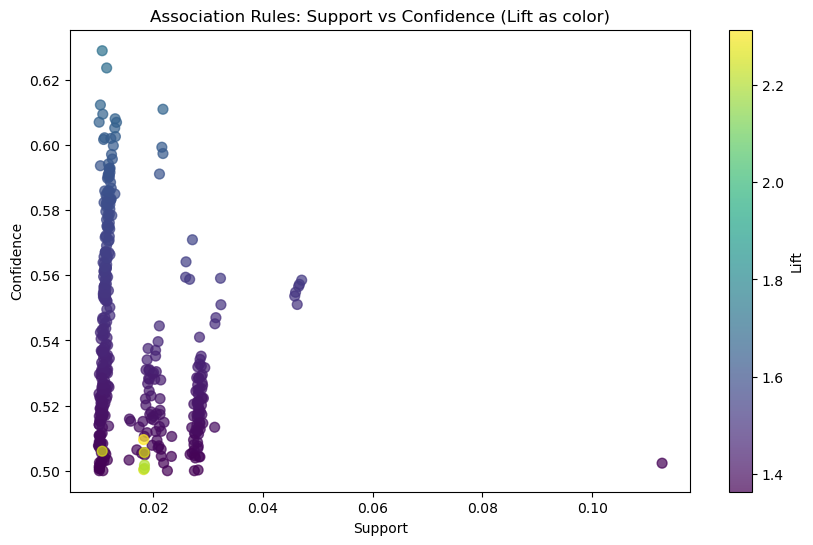

In [44]:
import matplotlib.pyplot as plt

# Plotting the association rules based on support, confidence, and lift
plt.figure(figsize=(10, 6))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], 
            c=association_rules_df['lift'], cmap='viridis', s=50, alpha=0.7)
plt.title('Association Rules: Support vs Confidence (Lift as color)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()

In [46]:
filtered_rules = association_rules_df[(association_rules_df['support'] > 0.05) & 
                                       (association_rules_df['confidence'] > 0.5)]
print(filtered_rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0        (10)         (2)            0.224426            0.366646  0.112732   

   confidence      lift  representativity  leverage  conviction  \
0    0.502314  1.370023               1.0  0.030447    1.272597   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.348239  0.235674   0.214205    0.404892  


In [48]:
association_rules_df.to_csv('association_rules.csv', index=False)

In [50]:
frequent_itemsets = apriori(binary_matrix, min_support=0.02, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [54]:
products_df = pd.read_csv('C:\\Users\\manoj\\OneDrive\\Desktop\\APOORVA\\products.csv', encoding='ISO-8859-1')

price_dict = dict(zip(products_df['product_id'], products_df['price']))

def calculate_revenue(row, price_dict):
    revenue = 0
    for item in row['antecedents']:
        revenue += price_dict.get(item, 0)
    for item in row['consequents']:
        revenue += price_dict.get(item, 0)
    return revenue

association_rules_df['revenue'] = association_rules_df.apply(calculate_revenue, axis=1, price_dict=price_dict)

association_rules_df_sorted = association_rules_df.sort_values(by='revenue', ascending=False)

print(association_rules_df_sorted[['antecedents', 'consequents', 'revenue']].head(10))

    antecedents consequents  revenue
0  (10, 44, 42)         (2)   836.71


In [56]:
# Filter rules with high lift and confidence
high_lift_rules = association_rules_df[association_rules_df['lift'] > 1.5]
high_confidence_rules = association_rules_df[association_rules_df['confidence'] > 0.6]

# Combine the two criteria
high_quality_rules = association_rules_df[(association_rules_df['lift'] > 1.5) & (association_rules_df['confidence'] > 0.6)]

# Display the filtered rules
print("High Lift Rules:\n", high_lift_rules[['antecedents', 'consequents', 'lift']].head(10))
print("\nHigh Confidence Rules:\n", high_confidence_rules[['antecedents', 'consequents', 'confidence']].head(10))
print("\nHigh-Quality Rules (Lift > 1.5 & Confidence > 0.6):\n", high_quality_rules[['antecedents', 'consequents', 'lift', 'confidence']].head(10))


High Lift Rules:
     antecedents consequents      lift
0  (10, 44, 42)         (2)  1.666328

High Confidence Rules:
     antecedents consequents  confidence
0  (10, 44, 42)         (2)    0.610953

High-Quality Rules (Lift > 1.5 & Confidence > 0.6):
     antecedents consequents      lift  confidence
0  (10, 44, 42)         (2)  1.666328    0.610953


In [58]:
from sklearn.metrics import precision_score, recall_score

# Example of recommended items and actual items bought by customers
recommended_items = [1, 2, 3, 4]  # Recommended by the model
actual_items = [2, 4, 5, 6]  # Actually bought by the customer

# Create binary vectors for recommended and actual items
all_items = set(recommended_items) | set(actual_items)
recommended_binary = [1 if item in recommended_items else 0 for item in all_items]
actual_binary = [1 if item in actual_items else 0 for item in all_items]

# Calculate Precision and Recall (binary classification)
precision = precision_score(actual_binary, recommended_binary)
recall = recall_score(actual_binary, recommended_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5
Recall: 0.5


In [59]:
# Check for common items
common_items = set(recommended_items) & set(actual_items)
print(f"Common items: {common_items}")

Common items: {2, 4}


### Performing Predictions

In [61]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample data
data = [
    [6, 47, 17],
    [18, 12, 23, 22, 27, 43, 38, 20, 35, 1],
    [9, 23, 2, 20, 26, 47, 37],
    [31, 18, 5, 13, 1, 21, 48, 16, 26, 2, 44, 32, 20, 37, 42, 35],
    [43, 29, 8, 37, 23, 45],
    [18, 15, 31, 11, 20, 32, 25, 6, 47],
    [14, 43, 6, 20, 7, 42, 41, 28, 10, 22, 46],
    [1, 43, 31, 37, 25, 32, 28, 35],
    [27, 1, 3, 2, 11, 45, 10, 44, 15]
]

# Convert data into a format suitable for Apriori (one-hot encoding)
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    antecedents       consequents   support  confidence  lift
0           (1)               (2)  0.222222    0.500000  1.50
1           (2)               (1)  0.222222    0.666667  1.50
2           (1)              (18)  0.222222    0.500000  1.50
3          (18)               (1)  0.222222    0.666667  1.50
4           (1)              (27)  0.222222    0.500000  2.25
..          ...               ...       ...         ...   ...
379        (32)   (1, 35, 37, 31)  0.222222    0.666667  3.00
380         (1)  (32, 35, 37, 31)  0.222222    0.500000  2.25
381        (35)   (32, 1, 37, 31)  0.222222    0.666667  3.00
382        (37)   (32, 1, 35, 31)  0.222222    0.500000  2.25
383        (31)   (32, 1, 35, 37)  0.222222    0.666667  3.00

[384 rows x 5 columns]


Output:
This will display the antecedents (items that are bought together), consequents (items that are often bought when the antecedents are bought), support, confidence, and lift for each rule.

Lift measures how much more likely the consequent is to be bought when the antecedent is bought, compared to random chance.
Support measures how frequently the itemset appears in the dataset.
Confidence measures how likely the consequent is given the antecedent.

### Recommendation 

In [74]:
import pandas as pd

rules = pd.DataFrame({
    'antecedents': [(1,), (2,), (1,), (18,), (1,), (32,)],
    'consequents': [(2,), (1,), (18,), (1,), (27,), (1, 35, 37, 31)],
    'support': [0.222, 0.222, 0.222, 0.222, 0.222, 0.222],
    'confidence': [0.5, 0.67, 0.5, 0.67, 0.5, 0.67],
    'lift': [1.5, 1.5, 1.5, 1.5, 2.25, 3.0]
})

recommendations = {}
for _, row in rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    if antecedent not in recommendations:
        recommendations[antecedent] = []
    recommendations[antecedent].append((consequent, row['confidence'], row['lift']))

# Recommendation function
def recommend_items(purchased_items, recommendations, min_confidence=0.5, min_lift=1.5):
    recommended_items = []
    purchased_set = set(purchased_items)  # Convert to set for easier matching
    for item in purchased_set:
        print(f"Checking rules for item {item}.")  # Debugging step
        for antecedent, consequent_list in recommendations.items():
            if item in antecedent:  # Check if item is part of antecedent
                print(f"Found rule for item {item} in antecedent {antecedent}: {consequent_list}")  # Debugging step
                for consequent, confidence, lift in consequent_list:
                    # Check if the rule meets the minimum confidence and lift conditions
                    print(f"Checking rule: Item {item} -> Recommend {consequent} (Confidence: {confidence}, Lift: {lift})")
                    if confidence >= min_confidence and lift >= min_lift:
                        print(f"Condition met! Adding {consequent} to recommendations.")  # Debugging step
                        recommended_items.extend(consequent)
                    else:
                        print(f"Condition not met. Skipping {consequent}.")  # Debugging step
            else:
                print(f"No match found in antecedent {antecedent} for item {item}.")  # Debugging step
    
    # Remove already purchased items from recommendations
    recommended_items = [item for item in recommended_items if item not in purchased_items]
    
    return recommended_items

# Example usage
purchased_items = [1, 2]  # Example items bought by the user
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")


Checking rules for item 1.
Found rule for item 1 in antecedent (1,): [((2,), 0.5, 1.5), ((18,), 0.5, 1.5), ((27,), 0.5, 2.25)]
Checking rule: Item 1 -> Recommend (2,) (Confidence: 0.5, Lift: 1.5)
Condition met! Adding (2,) to recommendations.
Checking rule: Item 1 -> Recommend (18,) (Confidence: 0.5, Lift: 1.5)
Condition met! Adding (18,) to recommendations.
Checking rule: Item 1 -> Recommend (27,) (Confidence: 0.5, Lift: 2.25)
Condition met! Adding (27,) to recommendations.
No match found in antecedent (2,) for item 1.
No match found in antecedent (18,) for item 1.
No match found in antecedent (32,) for item 1.
Checking rules for item 2.
No match found in antecedent (1,) for item 2.
Found rule for item 2 in antecedent (2,): [((1,), 0.67, 1.5)]
Checking rule: Item 2 -> Recommend (1,) (Confidence: 0.67, Lift: 1.5)
Condition met! Adding (1,) to recommendations.
No match found in antecedent (18,) for item 2.
No match found in antecedent (32,) for item 2.
Items recommended based on your pu

### Enhancing

In [ ]:
import pandas as pd
from itertools import combinations

# Sample data: Association rules
rules = pd.DataFrame({
    'antecedents': [(1,), (2,), (1,), (18,), (1,), (32,)],
    'consequents': [(2,), (1,), (18,), (1,), (27,), (1, 35, 37, 31)],
    'support': [0.222, 0.222, 0.222, 0.222, 0.222, 0.222],
    'confidence': [0.5, 0.67, 0.5, 0.67, 0.5, 0.67],
    'lift': [1.5, 1.5, 1.5, 1.5, 2.25, 3.0]
})

recommendations = {}
for _, row in rules.iterrows():
    antecedent = frozenset(row['antecedents']) 
    consequent = row['consequents']
    if antecedent not in recommendations:
        recommendations[antecedent] = []
    recommendations[antecedent].append((consequent, row['confidence'], row['lift']))

def recommend_items(purchased_items, recommendations, min_confidence=0.5, min_lift=1.5):
    recommended_items = []

    item_combinations = []
    for r in range(1, len(purchased_items) + 1):
        item_combinations.extend(combinations(purchased_items, r))
    
    for combination in item_combinations:
        combination_set = frozenset(combination)
        
        if combination_set in recommendations:
            for consequent, confidence, lift in recommendations[combination_set]:
                if confidence >= min_confidence and lift >= min_lift:

                    recommended_items.extend(consequent)
    
    recommended_items = [item for item in recommended_items if item not in purchased_items]
    
    return recommended_items

# Example usage
purchased_items = [1, 2]  
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")


In [83]:
purchased_items = [18, 32]  # Example items bought by the user
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")

Items recommended based on your purchase of [18, 32]: [1, 1, 35, 37, 31]


In [85]:
purchased_items = [1, 18]  # Example items bought by the user
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")

Items recommended based on your purchase of [1, 18]: [2, 27]


In [87]:
purchased_items = [32, 27]  # Example items bought by the user
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")

Items recommended based on your purchase of [32, 27]: [1, 35, 37, 31]


In [89]:
purchased_items = [1]  # Example item bought by the user
recommended = recommend_items(purchased_items, recommendations)

print(f"Items recommended based on your purchase of {purchased_items}: {recommended}")

Items recommended based on your purchase of [1]: [2, 18, 27]


# Part 2            

To analyze peak shopping days and times, we will primarily use the transactions.csv dataset since it contains the timestamp field, which provides the date and time of transactions.

### Total Sales by Day of the Week (Bar Graph)

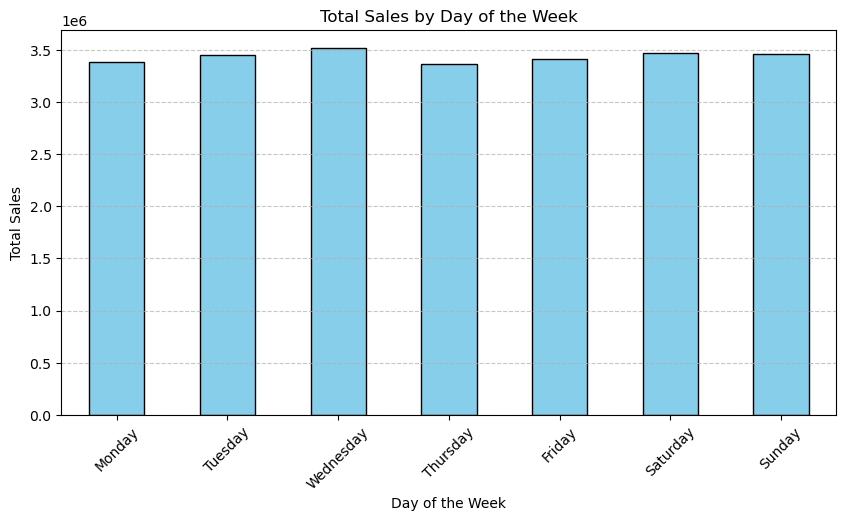

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the transactions dataset
transactions_path = "C:\\Users\\manoj\\OneDrive\\Desktop\\APOORVA\\transactions.csv"
df = pd.read_csv(transactions_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract day of the week and hour from timestamp
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour_of_day'] = df['timestamp'].dt.hour

# Aggregate transactions by day of the week
sales_by_day = df.groupby('day_of_week')['total_spent'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Aggregate transactions by hour of the day
sales_by_hour = df.groupby('hour_of_day')['total_spent'].sum()

# Plot sales distribution by day of the week
plt.figure(figsize=(10, 5))
sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Sales Heatmap: Hourly Trends Across the Week

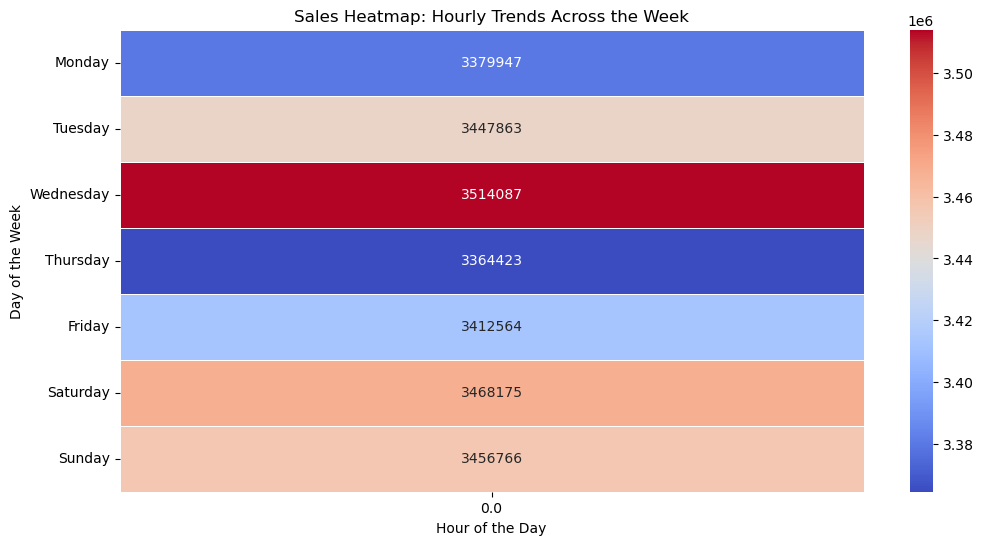

In [13]:
import seaborn as sns

# Group sales by day of the week and hour of the day
heatmap_data = df.groupby(['day_of_week', 'hour_of_day'])['total_spent'].sum().unstack()

# Reorder days of the week
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales Heatmap: Hourly Trends Across the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

### Sales Distribution Over Different Hours and Days (Box Plot)

C:\Users\manoj\AppData\Local\Temp\ipykernel_18620\176780742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour_of_day', y='total_spent', data=df, palette="coolwarm")


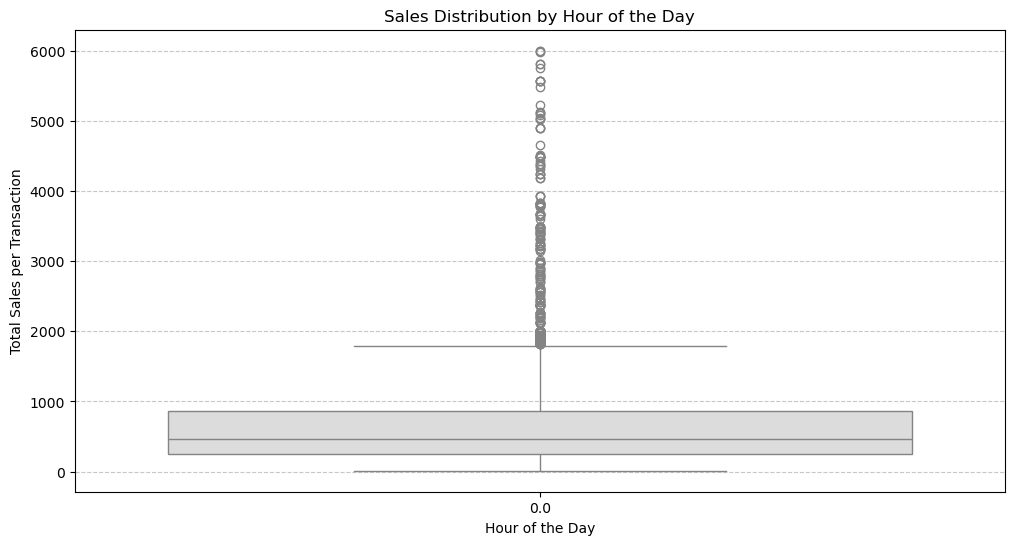

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_of_day', y='total_spent', data=df, palette="coolwarm")

plt.title("Sales Distribution by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales per Transaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Store-Wise Sales Performance (Bar Chart)t.show()


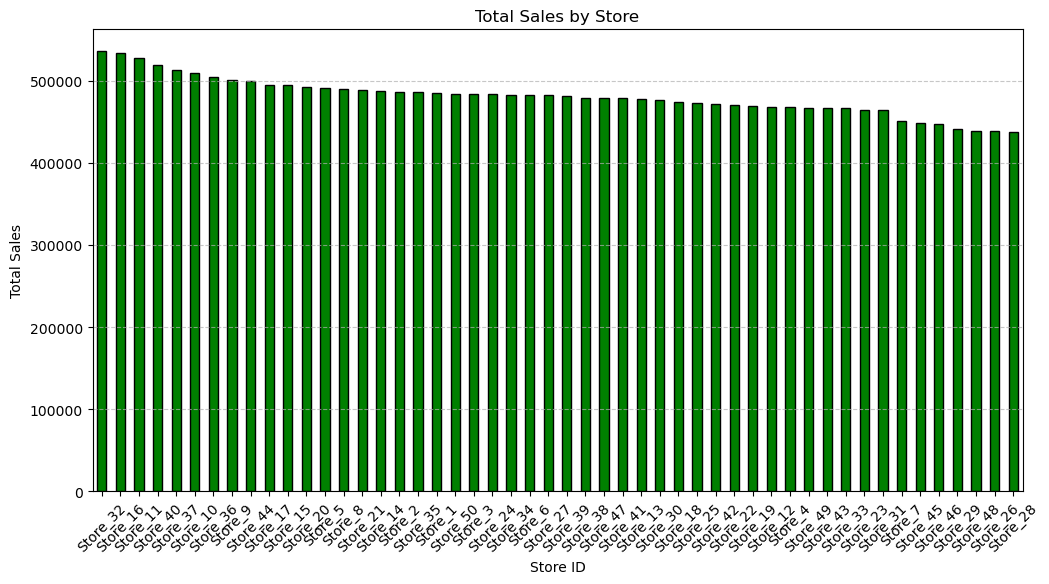

In [19]:
plt.figure(figsize=(12, 6))
sales_by_store = df.groupby('store_id')['total_spent'].sum().sort_values(ascending=False)
sales_by_store.plot(kind='bar', color='green', edgecolor='black')

plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pie Chart - Sales Contribution by Store

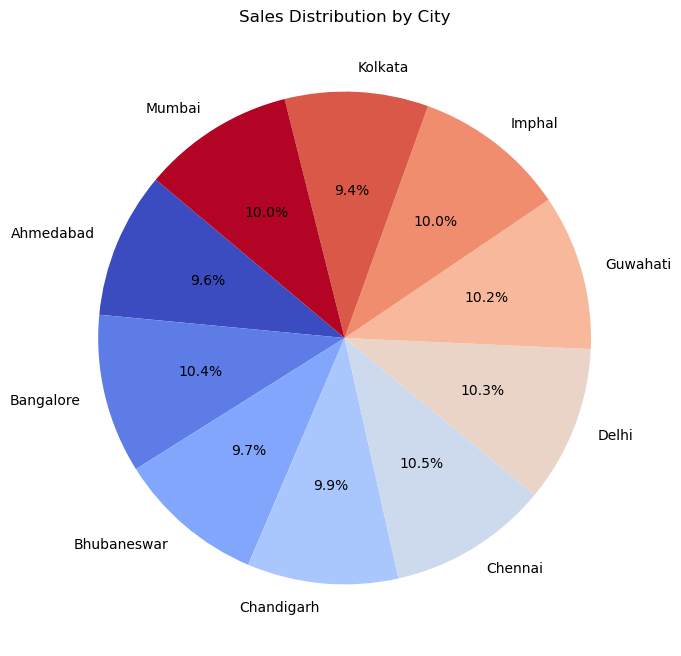

In [29]:
plt.figure(figsize=(8, 8))
city_sales = df.groupby('city')['total_spent'].sum()
city_sales.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=140)
plt.title("Sales Distribution by City")
plt.ylabel("")  # Hide y-axis label
plt.show()

### Pie Chart - Sales Contribution by Store

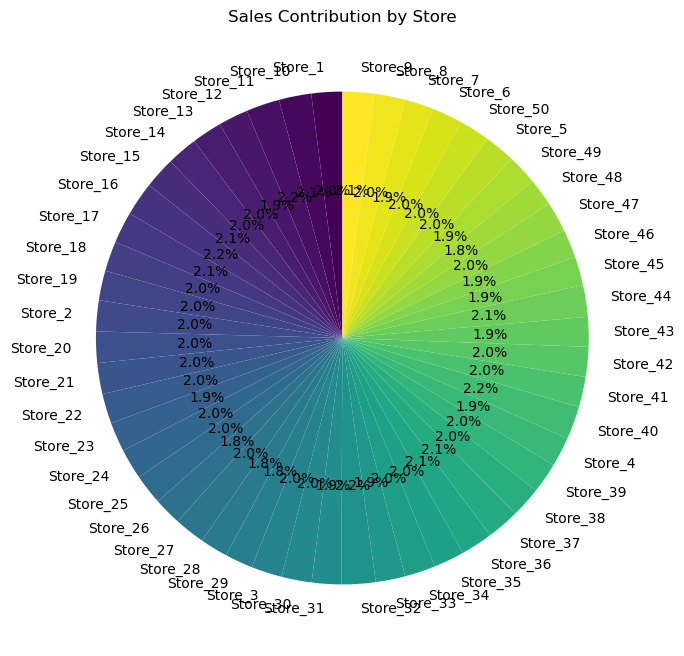

In [31]:
plt.figure(figsize=(8, 8))
store_sales = df.groupby('store_id')['total_spent'].sum()
store_sales.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', startangle=90)
plt.title("Sales Contribution by Store")
plt.ylabel("")  
plt.show()

### Pie Chart - Sales Distribution by Product Price Range

C:\Users\manoj\AppData\Local\Temp\ipykernel_18620\2070376492.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = df.groupby('price_range')['total_spent'].sum()


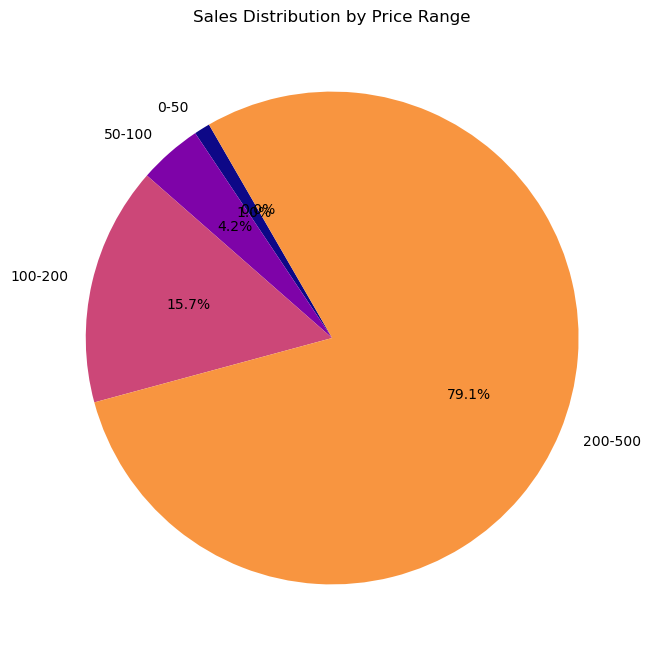

In [36]:
df['price_range'] = pd.cut(df['price'], bins=[0, 50, 100, 200, 500, 1000], labels=['0-50', '50-100', '100-200', '200-500', '500+'])

plt.figure(figsize=(8, 8))
price_sales = df.groupby('price_range')['total_spent'].sum()
price_sales.plot(kind='pie', autopct='%1.1f%%', cmap='plasma', startangle=120)
plt.title("Sales Distribution by Price Range")
plt.ylabel("")  
plt.show()